In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import lognorm
import statsmodels.api as sm

In [ ]:
website=pd.read_csv("2022-09-26_11-11-51.csv")

In [ ]:
website.head()

,sessions_session_data_session_start_week,sessions_total_sessions,sessions_total_bounced_sessions_percentage,sessions_average_session_duration,sessions_average_session_duration_sec
0,2022-09-24,21,0.333333,0.000841,72.666667
1,2022-09-23,111,0.378378,0.002380,205.594595
2,2022-09-22,108,0.324074,0.003306,285.638889
3,2022-09-21,95,0.252632,0.002519,217.610526
4,2022-09-20,90,0.300000,0.002890,249.655556


### Splitting date

In [ ]:
website=website.rename({'sessions_session_data_session_start_week':'sessionstartweek'},axis=1)

In [ ]:
website['sessionstartweekMonth']=pd.to_datetime(website['sessionstartweek']).dt.month

In [ ]:
website['sessionstartweekyear']=pd.to_datetime(website['sessionstartweek']).dt.year

In [ ]:
website['sessionstartweek']=website['sessionstartweek'].astype(str)

### Adding column version to group new and old version of website

In [ ]:
website['version']=website['sessionstartweek'].map(lambda x: 'new' if (x > '2022-08-15') else 'old' )

In [ ]:
website=website.dropna()

In [ ]:
website['sessionstartweek']=pd.to_datetime(website['sessionstartweek'])

In [ ]:
website

,sessionstartweek,sessions_total_sessions,sessions_total_bounced_sessions_percentage,sessions_average_session_duration,sessions_average_session_duration_sec,sessionstartweekMonth,sessionstartweekyear,version
0,2022-09-24,21,0.333333,0.000841,72.666667,9.0,2022.0,new
1,2022-09-23,111,0.378378,0.002380,205.594595,9.0,2022.0,new
2,2022-09-22,108,0.324074,0.003306,285.638889,9.0,2022.0,new
3,2022-09-21,95,0.252632,0.002519,217.610526,9.0,2022.0,new
4,2022-09-20,90,0.300000,0.002890,249.655556,9.0,2022.0,new
...,...,...,...,...,...,...,...,...
262,2022-01-05,71,0.507042,0.003014,260.436620,1.0,2022.0,old
263,2022-01-04,42,0.333333,0.002863,247.333333,1.0,2022.0,old
264,2022-01-03,31,0.322581,0.002218,191.677419,1.0,2022.0,old
265,2022-01-02,6,0.333333,0.005206,449.833333,1.0,2022.0,old


In [ ]:
website['sessionstartweek'].astype(str)

0      2022-09-24
1      2022-09-23
2      2022-09-22
3      2022-09-21
4      2022-09-20
          ...    
262    2022-01-05
263    2022-01-04
264    2022-01-03
265    2022-01-02
266    2022-01-01
Name: sessionstartweek, Length: 267, dtype: object

### Adding rows  with multiple of total sessions

In [ ]:


website=website.loc[website.index.repeat(website.sessions_total_sessions)].reset_index(drop=True)
    

In [ ]:
website

,sessionstartweek,sessions_total_sessions,sessions_total_bounced_sessions_percentage,sessions_average_session_duration,sessions_average_session_duration_sec,sessionstartweekMonth,sessionstartweekyear,version
0,2022-09-24,21,0.333333,0.000841,72.666667,9.0,2022.0,new
1,2022-09-24,21,0.333333,0.000841,72.666667,9.0,2022.0,new
2,2022-09-24,21,0.333333,0.000841,72.666667,9.0,2022.0,new
3,2022-09-24,21,0.333333,0.000841,72.666667,9.0,2022.0,new
4,2022-09-24,21,0.333333,0.000841,72.666667,9.0,2022.0,new
...,...,...,...,...,...,...,...,...
68714,2022-01-02,6,0.333333,0.005206,449.833333,1.0,2022.0,old
68715,2022-01-02,6,0.333333,0.005206,449.833333,1.0,2022.0,old
68716,2022-01-01,3,0.000000,0.001258,108.666667,1.0,2022.0,old
68717,2022-01-01,3,0.000000,0.001258,108.666667,1.0,2022.0,old


### Remove outlier months 2022-05-01 - 2022-08-12 as it includes count of sessions which are just in these 3 months and reason yet to be found

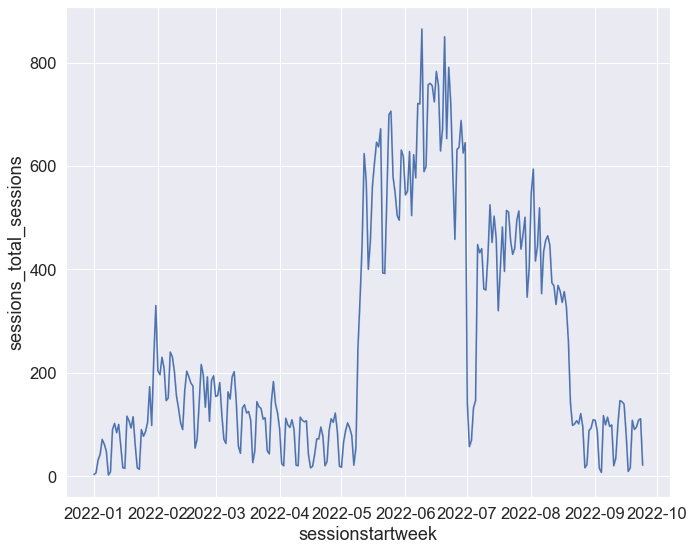

In [ ]:
fig = plt.figure(figsize=(10,8))

ax=sns.lineplot(data=website,x='sessionstartweek',y='sessions_total_sessions')
for rect in ax.patches:
         ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.40,rect.get_height(),horizontalalignment='center', fontsize = 13)

plt.tight_layout()

In [ ]:
website=website.drop(website[(website['sessionstartweek']>="2022-05-01") & (website['sessionstartweek']<= "2022-08-12") ].index)

### Considering only months 3,4 and 8,9  for analysis

In [ ]:
website=website.drop(website[(website['sessionstartweek']>="2022-01-01") & (website['sessionstartweek']<= "2022-02-28") ].index)

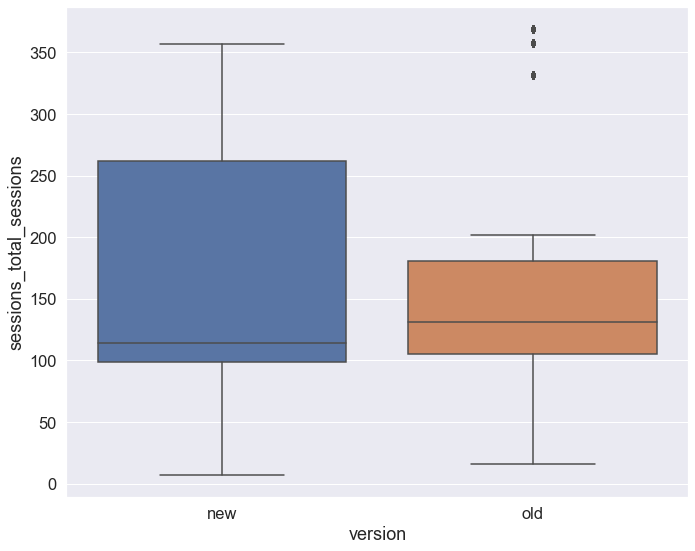

In [ ]:
fig = plt.figure(figsize=(10,8))
sns.set(font_scale=1.5)
sns.boxplot(data=website,y='sessions_total_sessions',x='version')
plt.tight_layout()

## Monthly average session duration

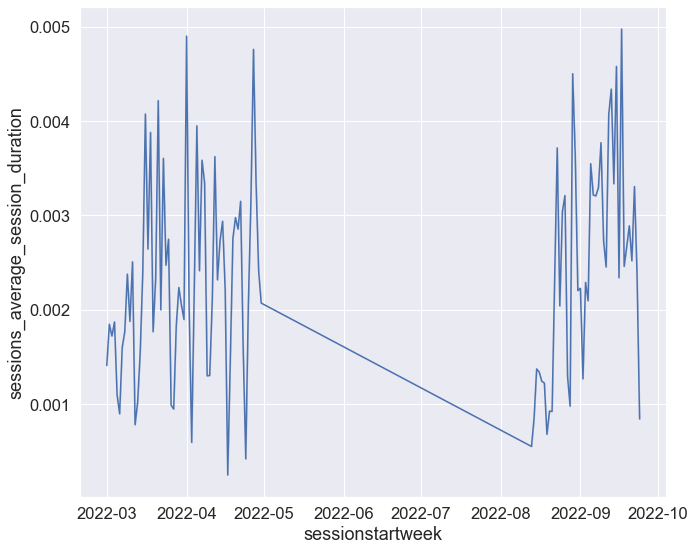

In [ ]:
fig = plt.figure(figsize=(10,8))

ax=sns.lineplot(data=website,x='sessionstartweek',y='sessions_average_session_duration')
for rect in ax.patches:
         ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.40,rect.get_height(),horizontalalignment='center', fontsize = 13)

plt.tight_layout()


Ho= There is no difference between  new and old website
H1= There is difference between  new and old website
 since we are comparing 2 different groups with different variance we are using two sample t-test 

In [ ]:
website

,sessionstartweek,sessions_total_sessions,sessions_total_bounced_sessions_percentage,sessions_average_session_duration,sessions_average_session_duration_sec,sessionstartweekMonth,sessionstartweekyear,version
0,2022-09-24,21,0.333333,0.000841,72.666667,9.0,2022.0,new
1,2022-09-24,21,0.333333,0.000841,72.666667,9.0,2022.0,new
2,2022-09-24,21,0.333333,0.000841,72.666667,9.0,2022.0,new
3,2022-09-24,21,0.333333,0.000841,72.666667,9.0,2022.0,new
4,2022-09-24,21,0.333333,0.000841,72.666667,9.0,2022.0,new
...,...,...,...,...,...,...,...,...
61583,2022-03-01,154,0.285714,0.001408,121.655844,3.0,2022.0,old
61584,2022-03-01,154,0.285714,0.001408,121.655844,3.0,2022.0,old
61585,2022-03-01,154,0.285714,0.001408,121.655844,3.0,2022.0,old
61586,2022-03-01,154,0.285714,0.001408,121.655844,3.0,2022.0,old


### Sample Size

In [ ]:
from scipy import stats
website.groupby('version').size().reset_index()

,version,0
0,new,4342
1,old,6892


### creating new  dataframe for newverion and old version data

In [ ]:
newversion=website[website['version']=='new'].reset_index()

In [ ]:
newversion=pd.DataFrame(newversion)

In [ ]:
oldversion=website[website['version']=='old'].reset_index()

### new version not normally distributed

/opt/homebrew/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sessions_average_session_duration', ylabel='Density'>

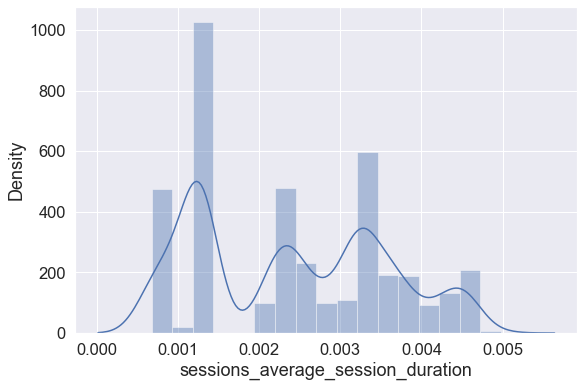

In [ ]:
from scipy.stats import boxcox
fig = plt.figure(figsize=(9,6))
sns.distplot((newversion['sessions_average_session_duration']))

### Remove outlier from old version

/opt/homebrew/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sessions_average_session_duration'>

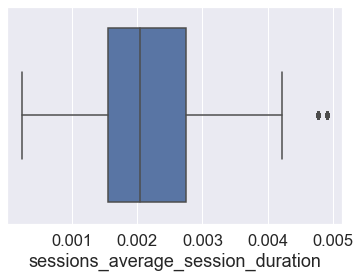

In [ ]:
sns.boxplot(oldversion['sessions_average_session_duration'])

In [ ]:
Q1 = np.percentile(oldversion['sessions_average_session_duration'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(oldversion['sessions_average_session_duration'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", oldversion.shape)
 
# Upper bound
upper = np.where(oldversion['sessions_average_session_duration'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(oldversion['sessions_average_session_duration'] <= (Q1-1.5*IQR))

Old Shape:  (6892, 9)


/var/folders/wp/v2w2kg4172qcrn_mfxg29y5c0000gp/T/ipykernel_1426/1637280781.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(oldversion['sessions_average_session_duration'], 25,
/var/folders/wp/v2w2kg4172qcrn_mfxg29y5c0000gp/T/ipykernel_1426/1637280781.py:4: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(oldversion['sessions_average_session_duration'], 75,


In [ ]:
oldversion=oldversion.drop('index',axis=1)

In [ ]:
oldversion.drop(upper[0], inplace = True)


### oldversion not normally distributed

/opt/homebrew/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sessions_average_session_duration'>

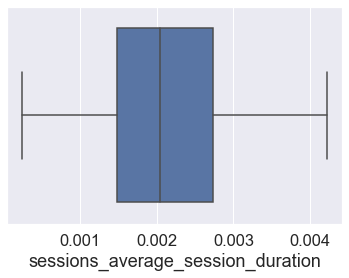

In [ ]:
sns.boxplot((oldversion['sessions_average_session_duration']))

### check normal distribution for old and new version

/opt/homebrew/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sessions_average_session_duration', ylabel='Density'>

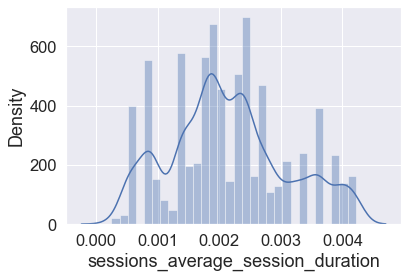

In [ ]:
sns.distplot((oldversion['sessions_average_session_duration']))

/opt/homebrew/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sessions_average_session_duration', ylabel='Density'>

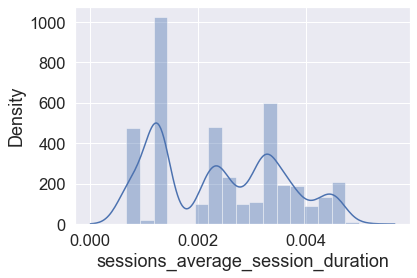

In [ ]:
sns.distplot((newversion['sessions_average_session_duration']))

### check distribution after transformation

#### Data is not normally distributed even after using below methods of tranformation
    -- Log
    -- Reciprocal
    -- Exponential
    -- sqrt
    --boxcox
    -- Note: Below only Reciprocal method is shown

In [ ]:
oldversion=1/(oldversion['sessions_average_session_duration'])

In [ ]:
oldversion = oldversion[oldversion.between(oldversion.quantile(.15), oldversion.quantile(.85))] 

/opt/homebrew/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sessions_average_session_duration', ylabel='Density'>

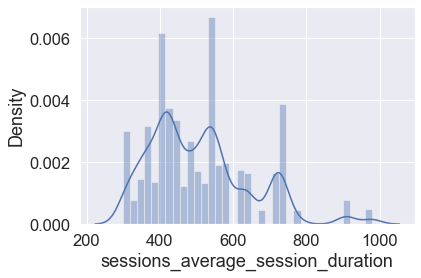

In [ ]:
sns.distplot(oldversion)

In [ ]:
newversion=1/(newversion['sessions_average_session_duration'])

In [ ]:
newversion = newversion[newversion.between(newversion.quantile(.15), newversion.quantile(.85))] 

/opt/homebrew/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sessions_average_session_duration', ylabel='Density'>

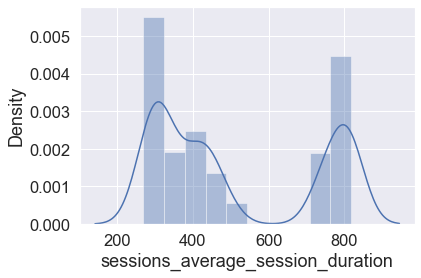

In [ ]:
sns.distplot(newversion)

#### Since data is not normally distributed using mannwhitneyu method 
    Alpha-0.05
    H0: pvalue <0.05 The two populations are equal versus

    H1:pvalue >0.05  The two populations are not equal.
    
    p value is lees then 0.05 so we conclude that 2 samples are equal to eachother
    There is no significant difference in old and new version

In [ ]:
from scipy.stats import mannwhitneyu
from scipy.stats import ranksums
stats.mannwhitneyu(newversion,oldversion,alternative='two-sided')

MannwhitneyuResult(statistic=6819774.0, pvalue=2.9873658965084503e-17)